# Understanding Descriptive Statistics

Import the necessary libraries here:

In [39]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
#import math
#import statistics

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# your code here
def dice_roll():
    dice_roll_lst =[]
    for i in range(10):
        dice_roll_lst.append(np.random.choice([1, 2, 3, 4, 5, 6]))
    dice_roll_df = pd.DataFrame(dice_roll_lst, columns = ['dice_value'])
    return dice_roll_df

dice_roll()

,dice_value
0,5
1,4
2,2
3,1
4,6
5,4
6,6
7,4
8,1
9,5


#### 2.- Plot the results sorted by value.

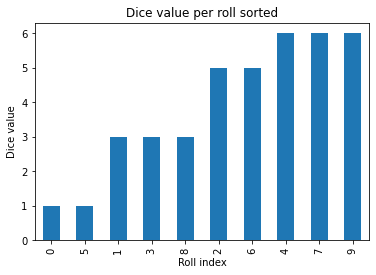

In [3]:
dice_df = dice_roll()
df_sorted = dice_df.sort_values(by = 'dice_value')
df_sorted.plot.bar(legend=None)
plt.xlabel('Roll index')
plt.ylabel('Dice value')
plt.title('Dice value per roll sorted')
plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

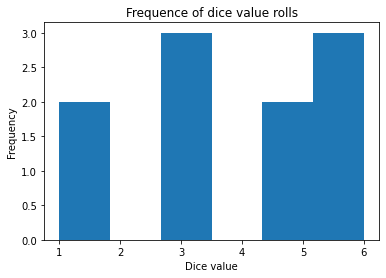

In [4]:
df_sorted.plot.hist(bins=6, legend=None)

# alernative via seaborn catplot

plt.xlabel('Dice value')
plt.title('Frequence of dice value rolls')
plt.show()

In [5]:
"""
Both plots show the frequency of 10 times a roll of a dice. In the plot above, each dice roll (all 10) is shown. 
In this plot, the freqency that each value is rolled is shown (so 6 values)
"""

'\nBoth plots show the frequency of 10 times a roll of a dice. In the plot above, each dice roll (all 10) is shown. \nIn this plot, the freqency that each value is rolled is shown (so 6 values)\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [6]:
def mean_value(x):
    """
    Function calculates mean from list or pandas series
    """  
    return np.sum(x)/len(x)

mean_value(dice_df['dice_value'])

3.9

In [7]:
#check with buildin mean() function
dice_df['dice_value'].mean()

3.9

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [8]:
results = pd.DataFrame(dice_df.value_counts(), columns = ['counts']).reset_index()
results['totals'] = results.dice_value * results.counts
results.totals.sum() / results.counts.sum()

3.9

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [9]:
def calculate_median(pandas_series):
    """
    Function calculates median from a pandas series
    """    
    list1 = sorted(list(pandas_series))
    middle_index = len(list1) / 2
    if len(list1) % 2 != 0:
        return list1[int(middle_index)]
    else:
        return (list1[int(middle_index)] + list1[int(middle_index-1)]) / 2
        
calculate_median(dice_df['dice_value'])

4.0

In [10]:
#check with buildin median function
dice_df['dice_value'].median()

4.0

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [11]:
def quartiles (pandas_series):
    list1 = sorted(list(pandas_series))
    middle_index = len(list1) / 2
    median = calculate_median(pandas_series)
    index_Q1 = middle_index / 2
    index_Q3 = middle_index / 2 + middle_index 
    Q1 = (list1[int(index_Q1)] + list1[int(index_Q1-1)]) / 2
    Q3 = (list1[int(index_Q3)] + list1[int(index_Q3-1)]) / 2
    Q4 = float(list1[-1])
    return print([Q1, median, Q3, Q4])

quartiles(dice_df['dice_value'])

[2.0, 4.0, 5.5, 6.0]


In [12]:
#check with buildin quartiles
dice_df.quantile([0.25, 0.5, 0.75, 1])

# first quartile gives different number, do not really know why
#paolo: there are multiple accepted ways to calculate quantiles--play with the "interpolation" parameter in quantile and compare the results
# with your method

,dice_value
0.25,3.00
0.50,4.00
0.75,5.75
1.00,6.00


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from [here](https://drive.google.com/file/d/1mDz-pl6Dpp0fvrXqkFTosuaW3mw6tfWP/view?usp=sharing), place it in the `data` folder and load it
#### 1.- Sort the values and plot them. What do you see?

In [13]:
dice_df = pd.read_csv('../data/roll_the_dice_hundred.csv')
dice_df = dice_df.drop('Unnamed: 0', axis = 1)
dice_df.head()

,roll,value
0,0,1
1,1,2
2,2,6
3,3,1
4,4,6


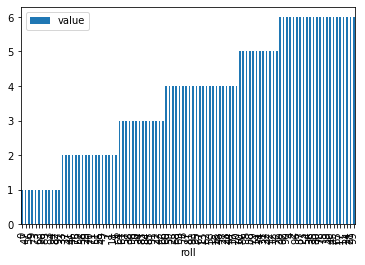

In [14]:
dice_df_sorted = dice_df[['roll', 'value']].sort_values(by = 'value', ascending = True)
dice_df_sorted.plot.bar(x = 'roll', y = 'value'); 

In [15]:
"""
You can see that 4 and 6 are rolled most, 1 and 5 the least, 2 and 3 average
"""

'\nYou can see that 4 and 6 are rolled most, 1 and 5 the least, 2 and 3 average\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [16]:
mean_value(dice_df['value'])

3.74

#### 3.- Now, calculate the frequency distribution.


In [17]:
dice_df_sorted['value'].value_counts()

6    23
4    22
2    17
3    14
5    12
1    12
Name: value, dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

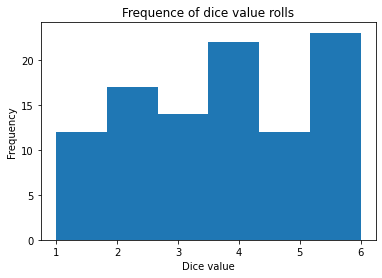

In [18]:
dice_df_sorted['value'].plot.hist(bins = 6, legend = None)
plt.xlabel('Dice value')
plt.title('Frequence of dice value rolls')
plt.show()

In [19]:
"""
Again you see that 6 and 4 are rolled most, therefore mean is above 3.5
"""

'\nAgain you see that 6 and 4 are rolled most, therefore mean is above 3.5\n'

#### 5 Read the `roll_the_dice_thousand.csv` from <br> 
[here](https://drive.google.com/file/d/1zYzEcKL1tA69WCACG8WhTEr7m9fojClZ/view?usp=sharing), place it in the `data` folder and load it. 
Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [20]:
dice_df = pd.read_csv('../data/roll_the_dice_thousand.csv')
dice_df = dice_df.drop('Unnamed: 0', axis = 1)
dice_df.head()

,roll,value
0,0,5
1,1,6
2,2,1
3,3,6
4,4,5


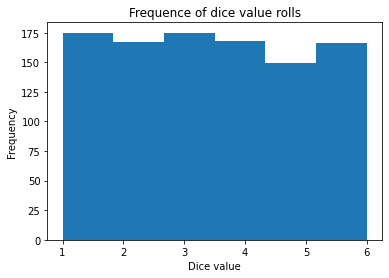

In [21]:
dice_df_sorted = dice_df[['roll', 'value']].sort_values(by = 'value', ascending = True)
dice_df_sorted['value'].plot.hist(bins = 6, legend = None)
plt.xlabel('Dice value')
plt.title('Frequence of dice value rolls')
plt.show()

In [22]:
"""
The frequencies become more evenly distributed because of higher number of rolls (sample becomes closer to population)
"""

'\nThe frequencies become more evenly distributed because of higher number of rolls (sample becomes closer to population)\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`

from [here](https://drive.google.com/file/d/1sHr5-fnvn9oBvxu3tlR4ANCnQHDV-bUc/view?usp=sharing), place it in the data folder and load it. <br>
Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

   observation
0         68.0
1         12.0
2         45.0
3         38.0
4         49.0


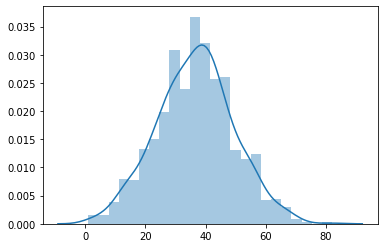

In [23]:
ages_df = pd.read_csv('../data/ages_population.csv')
print(ages_df.head())
sns.distplot(ages_df)
plt.show()

#mean around 35-40, standard deviation 15-20

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [24]:
print(ages_df.mean())
print(ages_df.std())

observation    36.56
dtype: float64
observation    12.8165
dtype: float64


In [25]:
"""
Mean is very close to my guess, std dev is a bit lower than expected
"""

'\nMean is very close to my guess, std dev is a bit lower than expected\n'

#### 3.- Now read the file `ages_population2.csv` 
from [here](https://drive.google.com/file/d/1RWGflLnwLOgZICUnrc9COzj3qcUeJP0X/view?usp=sharing) place it in the data folder and load it.  Calculate the frequency distribution and plot it.

   observation
0         25.0
1         31.0
2         29.0
3         31.0
4         29.0


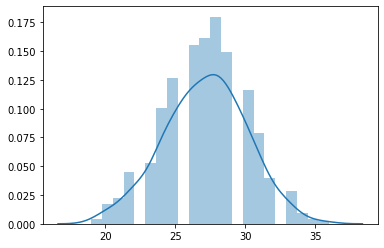

In [26]:
ages_df2 = pd.read_csv('../data/ages_population2.csv')
print(ages_df2.head())
sns.distplot(ages_df2)
plt.show()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [27]:
"""
In this neighbourhood ages are between 15-35 instead of 0-80. And certain ages not present like 23?, 26, 33?
"""

'\nIn this neighbourhood ages are between 15-35 instead of 0-80. And certain ages not present like 23?, 26, 33?\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [28]:
print(ages_df2.mean())
print(ages_df2.std())

observation    27.155
dtype: float64
observation    2.969814
dtype: float64


In [29]:
"""
of course mean is different, because smaller age group. Std dev 4 x times as low, makes sense because smaller age group
"""

'\nof course mean is different, because smaller age group. Std dev 4 x times as low, makes sense because smaller age group\n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv` 
from [here](https://drive.google.com/file/d/1knUGLeVUADYUXYqq_Ap48oTtLKkjHCNv/view?usp=sharing) and place it in the data folder. Calculate the frequency distribution and plot it.

   observation
0         21.0
1         21.0
2         24.0
3         31.0
4         54.0


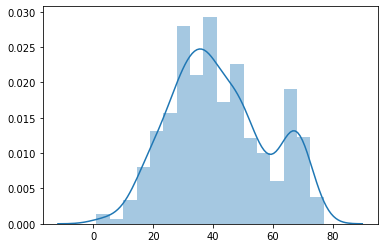

In [30]:
ages_df3 = pd.read_csv('../data/ages_population3.csv')
print(ages_df3.head())
sns.distplot(ages_df3)
plt.show()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [31]:
print(ages_df3.mean())
print(ages_df3.std())

observation    41.989
dtype: float64
observation    16.144706
dtype: float64


In [32]:
"""
Neighbourhoud with also bigger group with older people. Therefore mean goes up and std dev is higher
"""

'\nNeighbourhoud with also bigger group with older people. Therefore mean goes up and std dev is higher\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [33]:
ages_df3.quantile([0.25, 0.5, 0.75, 1])

,observation
0.25,30.0
0.50,40.0
0.75,53.0
1.00,77.0


In [34]:
"""
Median is lower than mean, meaning right skew. So more values to right of graph
"""

'\nMedian is lower than mean, meaning right skew. So more values to right of graph\n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [35]:
# so let's calculate the percentages closer to 1
print(ages_df3.quantile(0.80))
print(ages_df3.quantile(0.85))
print(ages_df3.quantile(0.90))

observation    57.0
Name: 0.8, dtype: float64
observation    64.0
Name: 0.85, dtype: float64
observation    67.0
Name: 0.9, dtype: float64


In [36]:
"""
10% of people are older than 67
15% of people are older than 64
20% of people are older than 57
"""

'\n10% of people are older than 67\n15% of people are older than 64\n20% of people are older than 57\n'

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [37]:
# your code here

In [38]:
"""
your comments here
"""

'\nyour comments here\n'